# Messy IPYNB File

### Reading in dataset and looking at some basic info / summary information

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df_e = pd.read_csv("data/tsunami-events.tsv", sep='\t')
df_e.head()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
2,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,4.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,NaN,-1365.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,NaN,-1300.0,NaN,NaN,NaN,NaN,NaN,2.0,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2714 entries, 0 to 2713
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Search Parameters                   1 non-null      object 
 1   Year                                2713 non-null   float64
 2   Mo                                  2565 non-null   float64
 3   Dy                                  2457 non-null   float64
 4   Hr                                  1399 non-null   float64
 5   Mn                                  1314 non-null   float64
 6   Sec                                 913 non-null    float64
 7   Tsunami Event Validity              2713 non-null   float64
 8   Tsunami Cause Code                  2709 non-null   float64
 9   Earthquake Magnitude                1530 non-null   float64
 10  Vol                                 150 non-null    float64
 11  More Info                           0 non-n

In [33]:
df_r = pd.read_csv("data/tsunami-runups.tsv", sep='\t')
# data is related to tsunami runup data which contains information on locations where tsunami effects were observed
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28642 entries, 0 to 28641
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Search Parameters             1 non-null      object 
 1   Year                          28641 non-null  float64
 2   Mo                            28537 non-null  float64
 3   Dy                            28422 non-null  float64
 4   Hr                            26762 non-null  float64
 5   Mn                            26532 non-null  float64
 6   Sec                           24015 non-null  float64
 7   Tsunami Event Validity        28641 non-null  float64
 8   Tsunami Cause Code            28641 non-null  float64
 9   Tsu Src                       28641 non-null  float64
 10  Earthquake Magnitude          26613 non-null  float64
 11  Vol                           2177 non-null   float64
 12  More Info                     0 non-null      float64
 13  D

/Users/giannabugieda/CISC367/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


After looking at the two potential datasets, I think it would be more useful to gear my analysis towards the effects of tsunamis, thus only using the runup dataset (since this dataset shows information based on where tsunami effects were observed).  The event dataset uses the source of the tsunami.


***Notes:***
* Topics of interest:
    * locations of earthquakes
    * intensity vs damage
    * how much damage/deaths are tsunamis causing (historical vs last 5-10 years)
* Notable:
    * Look into if there are reasons why some data is missing (year, geographic location, etc)

### Column Differentiation

#### What makes [Name] and [Name Description] different?

General answer: (https://www.ngdc.noaa.gov/hazel/view/hazards/tsunami/runup-data)
* [Name] columns have numbers whenever possible (deaths = # of deaths, houses destroyed = # houses destroyed)
* [Name Description] columns are categories of numerical data.  (For example: none, few, some, many, very many /  none, limited, moderate, severe extreme / etc).  They represent if a description of event was found in literature instead of number of deaths, the value is coded into a category representing a range of numbers.  If event has actual number of deaths, that number is also coded into a category for consistency).

### Some Summary Statistics

In [55]:
df = df_r #renaming for ease of use
# summary statistics on some column categories
deaths = df['Deaths'].describe()
damage = df['Damage $Mil'].describe()
damage_descrip = df['Damage Description'].describe()
print("Deaths:\n" + str(deaths))
print("\nDamage:\n" + str(damage))
print("\nDamage Description:\n" + str(damage_descrip))

Deaths:
count       743.000000
mean       1161.771198
std       12909.871526
min           0.000000
25%           3.000000
50%          15.000000
75%         100.500000
max      300000.000000
Name: Deaths, dtype: float64

Damage:
count       137.000000
mean       1697.063540
std       18792.843523
min           0.001000
25%           0.050000
50%           0.500000
75%          10.000000
max      220000.000000
Name: Damage $Mil, dtype: float64

Damage Description:
count    2198.000000
mean        1.375341
std         0.723286
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: Damage Description, dtype: float64


## Cleaning and reducing the dataset

I will be looking only at data that came from a definite tsunami event.  NOAA categorizes the validity of tsunami events by the following:
* -1 : erroneous entry
* 0: event that only caused disturbance in inland river
* 1: very doubtful tsunami
* 2: questionable tsunami
* 3: probable tsunami
* 4: definite tsunami

Based on these categories, to ensure all of my results and analysis deal with definite tsunamis, I will only be looking at data whose validity column is rated as a 4.


In [56]:
df = df[df['Tsunami Event Validity'] == 4]
df = df.drop(['More Info', 'Search Parameters'], axis=1)
df.head()

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Tsu Src,Earthquake Magnitude,...,Missing,Missing Description,Injuries,Injuries Description,Damage $Mil,Damage Description,Houses Destroyed,Houses Destroyed Description,Houses Damaged,Houses Damaged Description
2,-1610.0,NaN,NaN,NaN,NaN,NaN,4.0,6.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,-1610.0,NaN,NaN,NaN,NaN,NaN,4.0,6.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,-426.0,6.0,NaN,NaN,NaN,NaN,4.0,1.0,10.0,7.1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
6,-426.0,6.0,NaN,NaN,NaN,NaN,4.0,1.0,10.0,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-426.0,6.0,NaN,NaN,NaN,NaN,4.0,1.0,10.0,7.1,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN


## Looking into what the most common tsunami cause is:

1.0     23600
3.0      1979
7.0       421
6.0       238
9.0       102
8.0        89
4.0         8
10.0        5
0.0         1
Name: Tsunami Cause Code, dtype: int64


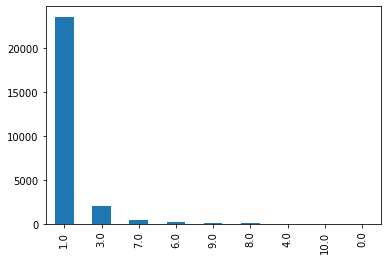

In [57]:
# figuring out cause code for tsnuami, turning numbers into categories, plotting bar chart of counts of each cause
# 0 - Unknown
# 1 - Earthquake
# 2 - Questionable Earthquake
# 3 - Earthquake and Landslide
# 4 - Volcano and Earthquake
# 5 - Volcano, Earthquake, and Landslide
# 6 - Volcano
# 7 - Volcano and Landslide
# 8 - Landslide
# 9 - Meteorological
# 10 - Explosion
# 11 - Astronomical Tide


# Should I condense categories or leave them be? (aka 1,2,3,4,5 all fall under earthquakes, 3,5,7,8 all under landslide. etc)
# This would cause some duplication - I'll try both and see


df['Tsunami Cause Code'].value_counts().plot(kind='bar')
causes = df[['Tsunami Cause Code']]
counts = df['Tsunami Cause Code'].value_counts()
print(counts)
plt.show()

In [66]:
#trying to condense categories to the following: unknown, earthquake, landslide, volcano, meterological, explosion, astronomical tide
#earthquakes = ['Earthquakes',]
earthquakes = [1,2,4,5]
volcanos = [4,5,6,7]
landslides = [3,5,7,8]

eq = causes[causes['Tsunami Cause Code'].isin(earthquakes)]
vol = causes[causes['Tsunami Cause Code'].isin(volcanos)]
land = causes[causes['Tsunami Cause Code'].isin(landslides)]
unknown = causes[causes['Tsunami Cause Code'] == 0]
met = causes[causes['Tsunami Cause Code'] == 9]
explo = causes[causes['Tsunami Cause Code'] == 10]
tide = causes[causes['Tsunami Cause Code'] == 11]

data = [unknown, eq, land, vol, met, explo, tide]
t_causes = pd.DataFrame(data, columns = ['Unknown','Earthquakes','Landslides','Meterological','Explosions','Tides'])



ValueError: Shape of passed values is (7, 1), indices imply (7, 6)

Idea for another question - does cause of tsnuami lead to differing impacts? aka do volcano events cause larger tsnuamis than landslides?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2714 entries, 0 to 2713
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Search Parameters                   1 non-null      object 
 1   Year                                2713 non-null   float64
 2   Mo                                  2565 non-null   float64
 3   Dy                                  2457 non-null   float64
 4   Hr                                  1399 non-null   float64
 5   Mn                                  1314 non-null   float64
 6   Sec                                 913 non-null    float64
 7   Tsunami Event Validity              2713 non-null   float64
 8   Tsunami Cause Code                  2709 non-null   float64
 9   Earthquake Magnitude                1530 non-null   float64
 10  Vol                                 150 non-null    float64
 11  More Info                           0 non-n

In [13]:
#cleaning df by removing some columns I won't be using:
t_df = df.drop(['More Info', 'Tsunami Magnitude (Abe)', 
                'Deaths', 'Missing','Injuries', 'Damage ($Mil)', 'Houses Destroyed', 'Houses Damaged',
               'Total Deaths', 'Total Missing', 'Total Damage ($Mil)', 'Total Houses Destroyed', 
                'Total Houses Damaged'], axis=1)
t_df.head()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,...,Damage Description,Houses Destroyed Description,Houses Damaged Description,Total Death Description,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage Description,Total Houses Destroyed Description,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,4.0,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN
2,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,4.0,6.0,NaN,...,3.0,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN
3,NaN,-1365.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
4,NaN,-1300.0,NaN,NaN,NaN,NaN,NaN,2.0,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
